In [113]:
# coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [27]:
# one_hot代表把0~9转换成10*1的向量(用0/1代表是哪个数字)
mnist = input_data.read_data_sets("./data/MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
x = tf.placeholder(tf.float32, [None, 784])

In [29]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [30]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [31]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [32]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [33]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [34]:
init = tf.global_variables_initializer()

In [35]:
sess = tf.Session()
sess.run(init)

In [36]:
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [37]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [38]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [39]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9186


In [40]:
test = tf.argmax(y,1)
res = sess.run(test, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print(res)

[7 2 1 ..., 4 5 6]


In [41]:
len(res)

10000

In [147]:
def show_mnist(data, label):
    row_num = 3; col_num = 2
    l = min(len(data), row_num * col_num)
    
    fig, ax = plt.subplots(row_num, col_num, figsize=(col_num*3, row_num*2.5))
    plt.tight_layout()
    
    for i in range(l):
        cur_ax = ax[int(i/col_num)][i%col_num]
        # 设置title
        label_num = np.argmax(label[i])
        cur_ax.set_title( label_num )
        # 隐藏xaxis, yaxis
        cur_ax.get_xaxis().set_visible(False)
        cur_ax.get_yaxis().set_visible(False)
        # 显示
        cur_ax.imshow(data[i].reshape(28,28), cmap=cm.binary)
#         sns.heatmap(data=data[i].reshape(28,28), ax=cur_ax)

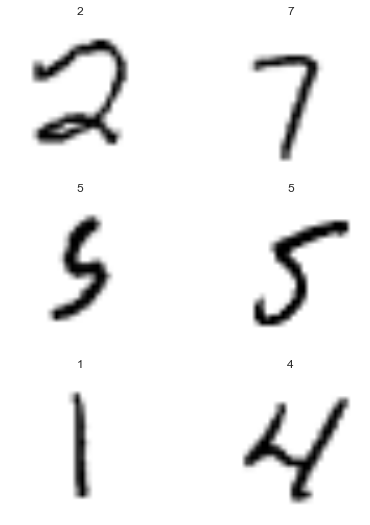

In [148]:
show_mnist(mnist.train.images[:20], mnist.train.labels[:20])